In [8]:
# Calculate the surface buoyancy flux from NEMO data

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import xarray.ufuncs as xu
import gsw
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# SPECIFY DATA LOCATION
rootdir = '/home/ocean1/DRAKKAR/ORCA025.L75-GJM189-S/'
rho_delta = 0.05
rho_range = np.arange(20,30,rho_delta)

[ 20.    20.05  20.1   20.15  20.2   20.25  20.3   20.35  20.4   20.45
  20.5   20.55  20.6   20.65  20.7   20.75  20.8   20.85  20.9   20.95  21.
  21.05  21.1   21.15  21.2   21.25  21.3   21.35  21.4   21.45  21.5
  21.55  21.6   21.65  21.7   21.75  21.8   21.85  21.9   21.95  22.    22.05
  22.1   22.15  22.2   22.25  22.3   22.35  22.4   22.45  22.5   22.55
  22.6   22.65  22.7   22.75  22.8   22.85  22.9   22.95  23.    23.05
  23.1   23.15  23.2   23.25  23.3   23.35  23.4   23.45  23.5   23.55
  23.6   23.65  23.7   23.75  23.8   23.85  23.9   23.95  24.    24.05
  24.1   24.15  24.2   24.25  24.3   24.35  24.4   24.45  24.5   24.55
  24.6   24.65  24.7   24.75  24.8   24.85  24.9   24.95  25.    25.05
  25.1   25.15  25.2   25.25  25.3   25.35  25.4   25.45  25.5   25.55
  25.6   25.65  25.7   25.75  25.8   25.85  25.9   25.95  26.    26.05
  26.1   26.15  26.2   26.25  26.3   26.35  26.4   26.45  26.5   26.55
  26.6   26.65  26.7   26.75  26.8   26.85  26.9   26.95  27.    2

In [12]:
# LOAD DATA

# Load data files
t = 'y1958m01d10'
%time datT = xr.open_mfdataset(rootdir+'1958/ORCA025.L75-GJM189_'+t+'_gridT.nc',chunks={'x':1442,'y':1021})
#print datT

# Load grid data
grid = xr.open_dataset(rootdir+'GRID/ORCA025.L75-GJM189_mesh_hgr.nc')
print grid

CPU times: user 20 ms, sys: 10 ms, total: 30 ms
Wall time: 26.9 ms
<xarray.Dataset>
Dimensions:       (t: 1, x: 1442, y: 1021, z: 75)
Coordinates:
  * y             (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * z             (z) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * t             (t) int64 0
Data variables:
    nav_lon       (y, x) float32 72.75 73.0 73.25 73.5 73.75 74.0 74.25 74.5 ...
    nav_lat       (y, x) float32 -77.0105 -77.0105 -77.0105 -77.0105 ...
    nav_lev       (z) float32 9.96921e+36 9.96921e+36 9.96921e+36 ...
    time_counter  (t) float32 9.96921e+36
    glamt         (t, y, x) float32 72.75 73.0 73.25 73.5 73.75 74.0 74.25 ...
    glamu         (t, y, x) float32 72.875 73.125 73.375 73.625 73.875 ...
    glamv         (t, y, x) float32 72.75 73.0 73.25 73.5 73.75 74.0 74.25 ...
    glamf         (t, y, x) float32 72.875 73.125 73.375 73.625 73.875 

In [7]:
# Calculate buoyancy flux
rho0 = gsw.rho_xarray(datT.vosaline.isel(deptht=0),datT.votemper.isel(deptht=0),0)
alpha = gsw.alpha_xarray(datT.vosaline.isel(deptht=0),datT.votemper.isel(deptht=0),0)
beta = gsw.beta_xarray(datT.vosaline.isel(deptht=0),datT.votemper.isel(deptht=0),0)
D_T = -(alpha/gsw.cp0)*datT.sohefldo
D_S = rho0*beta*datT.vosaline.isel(deptht=0)*datT.sowaflup/1000
D_in = D_T + D_S
print D_in

<xarray.DataArray (time_counter: 730, y: 1021, x: 1442)>
dask.array<add-b1a..., shape=(730, 1021, 1442), dtype=float64, chunksize=(1, 1021, 1442)>
Coordinates:
    deptht        float32 0.50576
  * y             (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * time_counter  (time_counter) datetime64[ns] 1960-01-03T12:00:00 ...


In [ ]:
# Calculate water mass transformation and formation rates

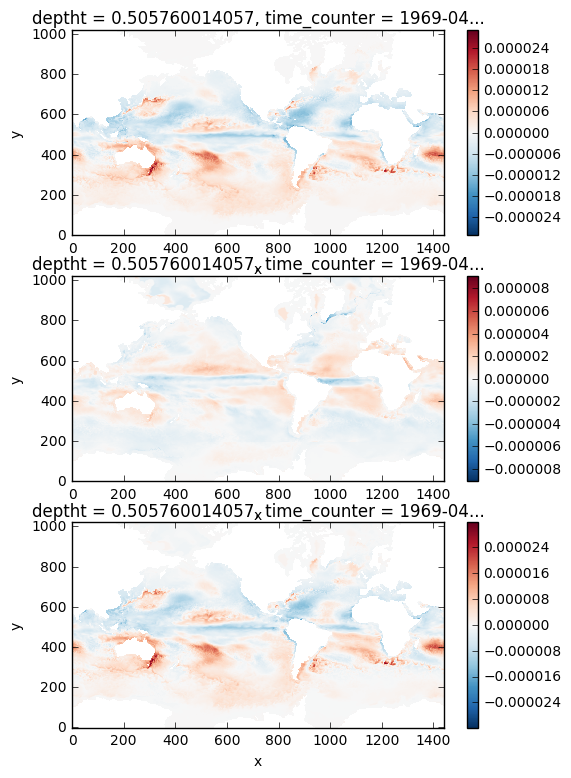

In [6]:
# Plot buoyancy flux
t='1969-04-20T12:00:00.000000000'
fig, (ax1,ax2, ax3) = plt.subplots(nrows=3,figsize=(6,9))
D_T.sel(time_counter=t).plot(ax=ax1)
D_S.sel(time_counter=t).plot(ax=ax2)
D_in.sel(time_counter=t).plot(ax=ax3)